<a href="https://colab.research.google.com/github/PrachiShirsath/Hello_world/blob/main/MLPracticalimp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

# Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(filename)

print("Dataset Loaded Successfully")
print(df.head())


Saving spotify_analysis_dataset.csv to spotify_analysis_dataset (1).csv
Dataset Loaded Successfully
  track_id track_name     artist     album release_date  duration_ms  \
0  TRK1000     Song 0   Artist 7   Album 3   2010-01-01       240151   
1  TRK1001     Song 1   Artist 4   Album 5   2010-01-02       253767   
2  TRK1002     Song 2  Artist 13  Album 19   2010-01-03       244375   
3  TRK1003     Song 3  Artist 11   Album 7   2010-01-04       299262   
4  TRK1004     Song 4   Artist 8   Album 9   2010-01-05       256330   

   popularity  danceability  energy  loudness  speechiness  acousticness  \
0          70         0.037   0.349     -2.87        0.522         0.616   
1          58         0.610   0.726    -22.87        0.770         0.635   
2          85         0.503   0.897     -1.33        0.216         0.045   
3          27         0.051   0.887     -1.46        0.623         0.375   
4          65         0.279   0.780     -5.88        0.085         0.626   

   instrum

In [74]:
#data cleaning:

print("Missing values:\n", df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()

print("Cleaned Dataset Shape:", df.shape)


Missing values:
 track_id            0
track_name          0
artist              0
album               0
release_date        0
duration_ms         0
popularity          0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
popular             0
dtype: int64
Cleaned Dataset Shape: (50, 17)


Prediction (danceability = 0.6): 48.34419272806917


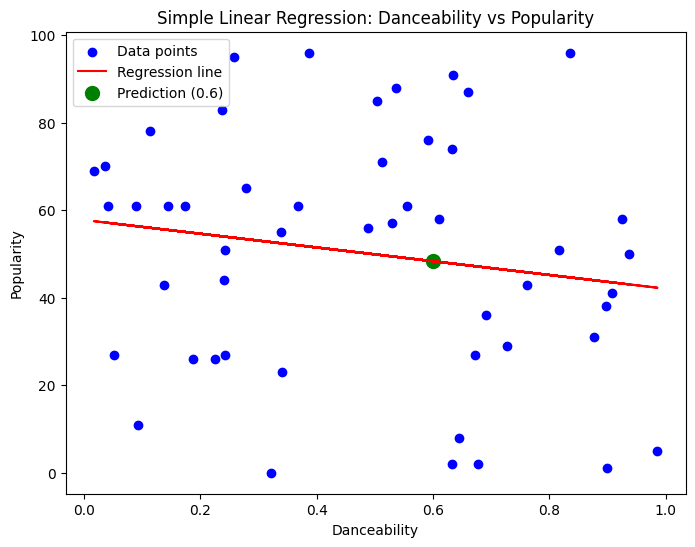

In [68]:
#simple linear regression:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['danceability']]
y = df['popularity']

slr = LinearRegression()
slr.fit(X, y)
test_input = pd.DataFrame([[0.6]], columns=['danceability'])
prediction = slr.predict(test_input)
print("Prediction (danceability = 0.6):", prediction[0])


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, slr.predict(X), color='red', label='Regression line')
plt.scatter(0.6, prediction, color='green', s=100, label='Prediction (0.6)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Simple Linear Regression: Danceability vs Popularity')
plt.legend()
plt.show()


Multiple LR Prediction: 46.608424395717094


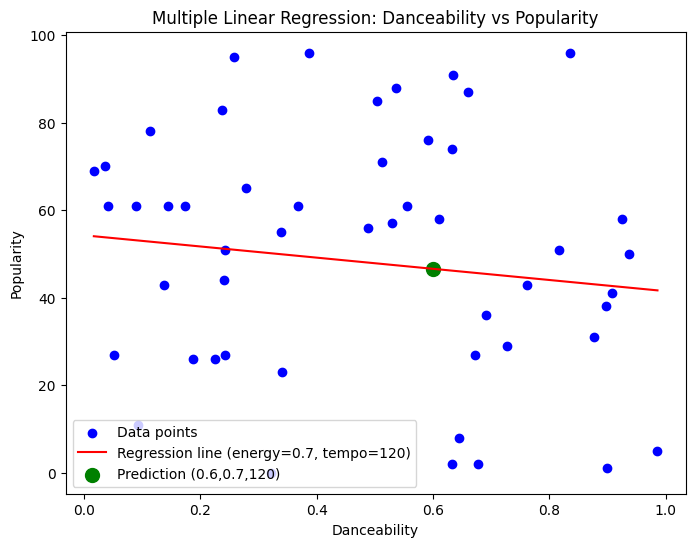

In [69]:
#multiple linear regression:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X_multi = df[['danceability', 'energy', 'tempo']]
y_multi = df['popularity']
mlr = LinearRegression()
mlr.fit(X_multi, y_multi)


new_data = pd.DataFrame([[0.6, 0.7, 120]], columns=['danceability', 'energy', 'tempo'])
prediction = mlr.predict(new_data)
print("Multiple LR Prediction:", prediction[0])

danceability_range = np.linspace(df['danceability'].min(), df['danceability'].max(), 100)
X_plot = pd.DataFrame({
    'danceability': danceability_range,
    'energy': [0.7]*100,
    'tempo': [120]*100
})
y_plot = mlr.predict(X_plot)

plt.figure(figsize=(8, 6))
plt.scatter(df['danceability'], y_multi, color='blue', label='Data points')
plt.plot(danceability_range, y_plot, color='red', label='Regression line (energy=0.7, tempo=120)')
plt.scatter(0.6, prediction, color='green', s=100, label='Prediction (0.6,0.7,120)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Multiple Linear Regression: Danceability vs Popularity')
plt.legend()
plt.show()


Logistic Probability: [[0.52962112 0.47037888]]
Logistic Prediction: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


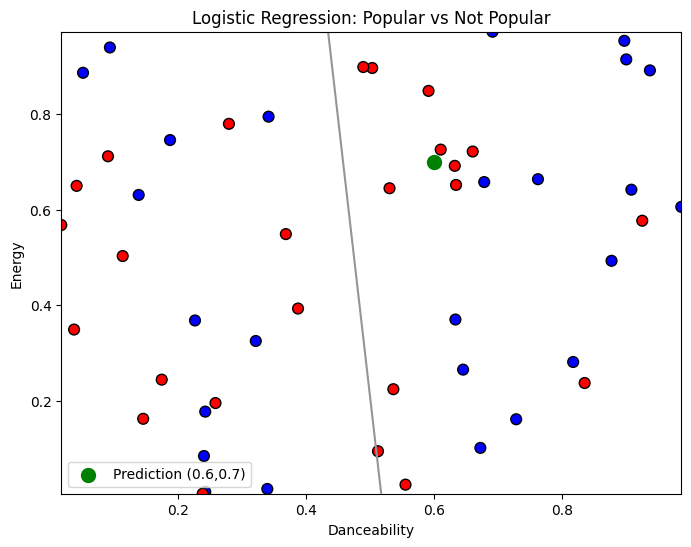

In [70]:
#logistic Regression:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

df['popular'] = (df['popularity'] >= df['popularity'].median()).astype(int)
X_log = df[['danceability', 'energy']]
y_log = df['popular']

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_log, y_log)


new_data = pd.DataFrame([[0.6, 0.7]], columns=['danceability', 'energy'])
probability = log_reg.predict_proba(new_data)
prediction = log_reg.predict(new_data)
print("Logistic Probability:", probability)
print("Logistic Prediction:", prediction[0])

plt.figure(figsize=(8, 6))
plt.scatter(df['danceability'], df['energy'], c=y_log, cmap='bwr', edgecolor='k', s=60)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Logistic Regression: Popular vs Not Popular')

xx, yy = np.meshgrid(
    np.linspace(df['danceability'].min(), df['danceability'].max(), 200),
    np.linspace(df['energy'].min(), df['energy'].max(), 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)
plt.scatter(new_data['danceability'], new_data['energy'], color='green', s=100, label='Prediction (0.6,0.7)')
plt.legend()
plt.show()


Decision Tree Prediction: 1


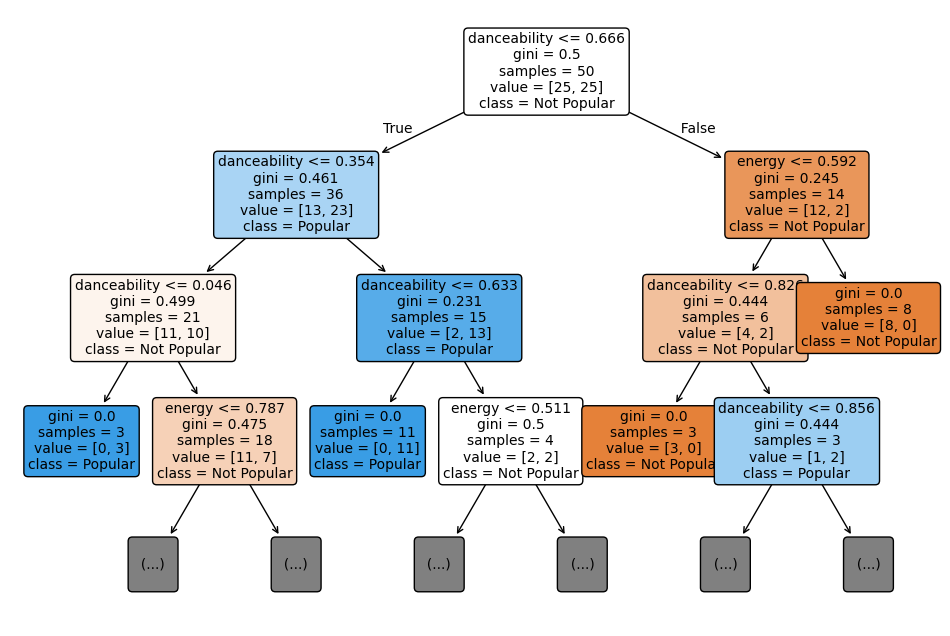

In [71]:
#Decision tree:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


dt = DecisionTreeClassifier()
dt.fit(X_log, y_log)


new_data = pd.DataFrame([[0.65, 0.8]], columns=['danceability', 'energy'])
prediction = dt.predict(new_data)
print("Decision Tree Prediction:", prediction[0])



plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    feature_names=X_log.columns,
    class_names=['Not Popular', 'Popular'],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3 # Limit depth for clarity
)
plt.show()


SVM Prediction: 1


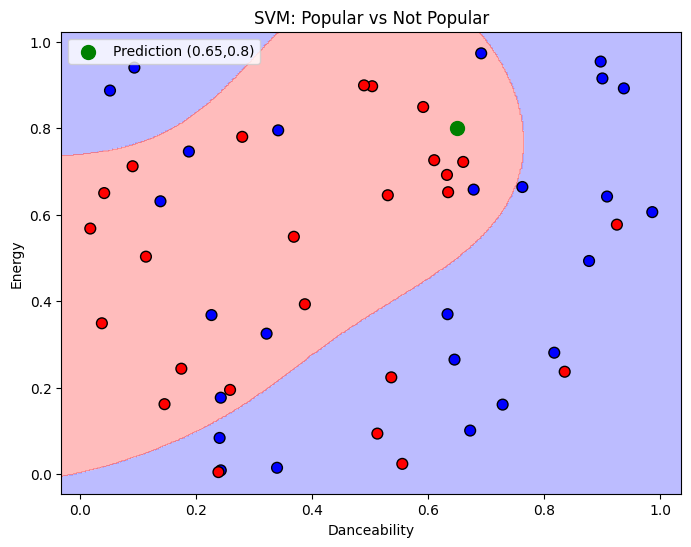

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_log, y_log)


new_data = pd.DataFrame([[0.65, 0.8]], columns=['danceability', 'energy'])
prediction = svm.predict(new_data)
print("SVM Prediction:", prediction[0])


x_min, x_max = X_log['danceability'].min() - 0.05, X_log['danceability'].max() + 0.05
y_min, y_max = X_log['energy'].min() - 0.05, X_log['energy'].max() + 0.05

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['danceability', 'energy'])
Z = svm.predict(grid).reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_log['danceability'], X_log['energy'], c=y_log, edgecolor='k', cmap='bwr', s=60)
plt.scatter(new_data['danceability'], new_data['energy'], color='green', s=100, label='Prediction (0.65,0.8)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('SVM')
plt.legend()
plt.show()


Random Forest Prediction: 1


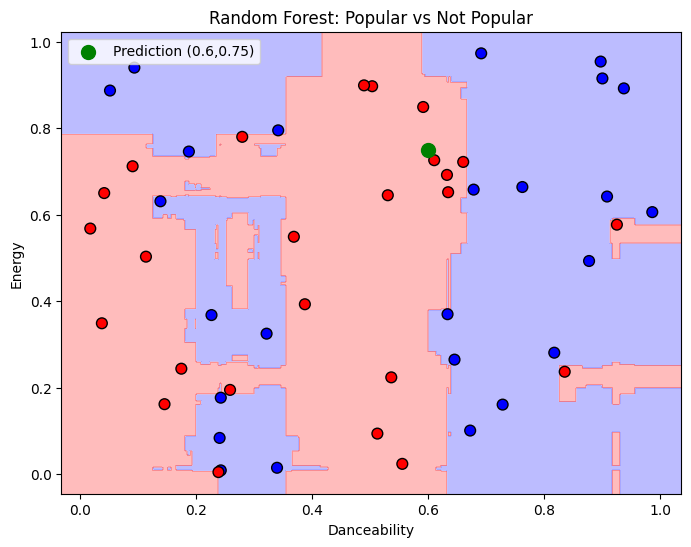

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_log, y_log)

new_data = pd.DataFrame([[0.6, 0.75]], columns=['danceability', 'energy'])
prediction = rf.predict(new_data)
print("Random Forest Prediction:", prediction[0])


x_min, x_max = X_log['danceability'].min() - 0.05, X_log['danceability'].max() + 0.05
y_min, y_max = X_log['energy'].min() - 0.05, X_log['energy'].max() + 0.05

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['danceability', 'energy'])
Z = rf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_log['danceability'], X_log['energy'], c=y_log, edgecolor='k', cmap='bwr', s=60)
plt.scatter(new_data['danceability'], new_data['energy'], color='green', s=100, label='Prediction (0.6,0.75)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Random Forest')
plt.legend()
plt.show()


Gradient Descent Equation:
Popularity = -6.2478 * Danceability + 52.9631
Prediction for danceability=0.6: 49.21440519207762


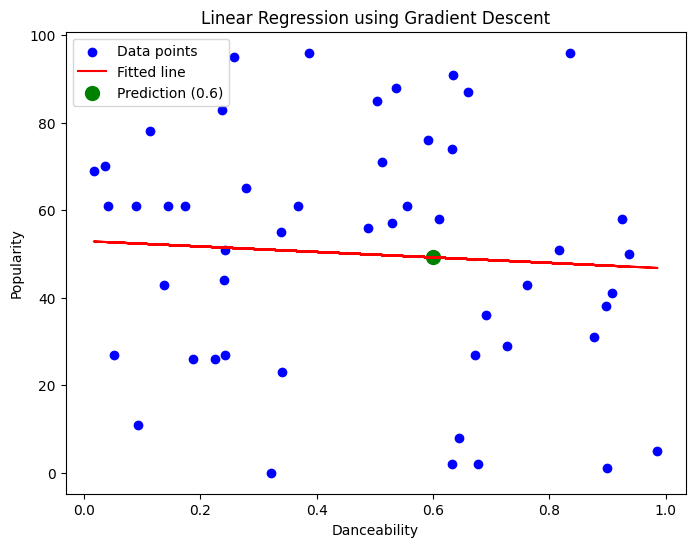

In [58]:
#Gradient Descent Equation:
import numpy as np
import matplotlib.pyplot as plt

X_gd = df['danceability'].values
y_gd = df['popularity'].values


m = 0
c = 0
lr = 0.01
epochs = 1000
n = len(X_gd)


for _ in range(epochs):
    y_pred = m * X_gd + c
    dm = (-2/n) * sum(X_gd * (y_gd - y_pred))
    dc = (-2/n) * sum(y_gd - y_pred)
    m -= lr * dm
    c -= lr * dc


print("Gradient Descent Equation:")
print("Popularity = {:.4f} * Danceability + {:.4f}".format(m, c))
print("Prediction for danceability=0.6:", m*0.6 + c)


plt.figure(figsize=(8,6))
plt.scatter(X_gd, y_gd, color='blue', label='Data points')
plt.plot(X_gd, m*X_gd + c, color='red', label='Fitted line')
plt.scatter(0.6, m*0.6 + c, color='green', s=100, label='Prediction (0.6)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()


Neural Network Prediction: 30.390247


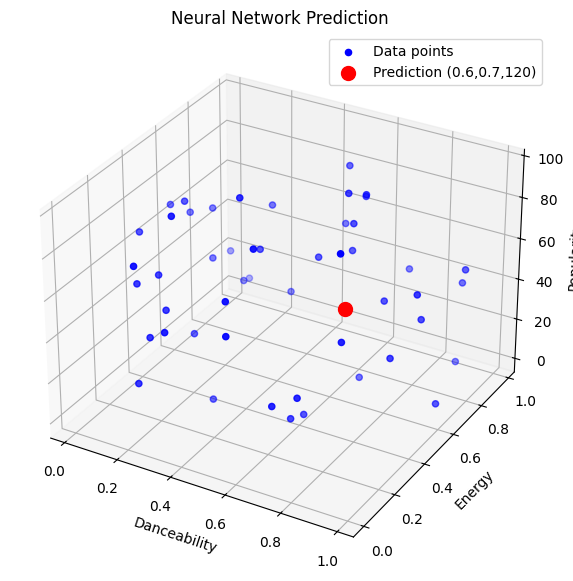

In [76]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_nn = df[['danceability', 'energy', 'tempo']]
y_nn = df['popularity']


model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_nn, y_nn, epochs=50, verbose=0)


test_input = np.array([[0.6, 0.7, 120]], dtype=np.float32)

prediction = model.predict(test_input, verbose=0)
print("Neural Network Prediction:", prediction[0][0])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_nn['danceability'], X_nn['energy'], y_nn, color='blue', label='Data points')
ax.scatter(test_input[0,0], test_input[0,1], prediction[0][0], color='red', s=100, label='Prediction (0.6,0.7,120)')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Popularity')
ax.set_title('Neural Network Prediction')
ax.legend()
plt.show()
